## Project Planning Stage (Individual)
#### Peter Wojnicki | 78625613 | Group 9 | Section 008

### <u>(1) Data Description:</u>

<center><b>Table 1.</b> Overview of Data with Number of Columns and Observations</center>

| Source File Name | Number of Columns | Total Number of Observations |
|:-:|:-:|:-:|
|players.csv| 7 | 196 |
|sessions.csv| 5 | 1535 | 

#### **Players Dataset**

**experience (chr):** "Amateur", "Beginner", "Regular", "Pro", "Veteran" assigned based on experience.

**subscribe (lgl):** "True" or "False" if subscribed.

**hashedEmail (chr):** Hashed Email of player.

**played_hours (dbl):** Number of hours played.

**name (chr):** Name of player.

**gender (chr):** "Female" or "Male" for gender of player.

**Age (dbl):** Age of player.

#### Potential Issues:
- experience is self-declared and might have some bias
- joining players with sessions might pose issues

#### **Sessions Dataset**

**hashedEmail (chr):** Hashed Email of player.

**start_time (chr):** Start time of session in format of DAY/MONTH/YEAR HOUR:MINUTE.

**end_time (chr):** End time of session in format of DAY/MONTH/YEAR HOUR:MINUTE.

**original_start_time (dbl):** Start time recorded in UNIX time (milliseconds).

**original_end_time (dbl):** End time recorded in UNIX time (milliseconds).

#### Potential Issues:
- start_time and end_time are dates and times that both need to be wrangled into a usable form
- original_start_time and original_end_time are in milliseconds

### <u>(2) Questions:</u>

I hope to address demand forecasting and use this data to predict highest demand periods for licences and server demand. Since we have the start and end times of the sessions, we can understand which days and times that players start playing the game. Studying these dates and times could offer vital clues when most players will login and when resources should be appropriately allocated to avoid outages and disruption of services.

### <u>(3) Exploratory Data Analysis and Visualization</u>

<center><b>Table 2.</b> Summary statistics for variables of interest</center>

| Variable Name | Mean | Median | Minimum | Maximum | Number of Observations |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Player Age (years) | 21.14 | 19 | 9 | 58 | 196 |
|Played Hours (hours) | 5.85 | 0.1 | 0 | 223.1 | 196 |
|Elapsed Session Time (minutes) | 50.86 | 30 | 3 | 259 | 1535 |
|Start Date (Month Day)| June 24 | June 24 | April 06 | Sept 26 | 1535 |
|End Date (Month Day)| June 24 | June 23 | April 06 | Sept 26 | 1535 |


#### **Histograms for Quantitative Data**

<p>The following histograms reveal some interesting patterns within the data that might help to shed some light on demand forecasting. From the ages histogram we can see that most players are around their early 20s and the average played hours is close to 5.85 hours with some outliers like 259. The data spans from April 6th to September 26 with the average players starting to play around June 24. When investigating the start time histogram (Histogram 1.5), we can see that most players start playing around midnight to 6 am in the morning while barely anyone played from around 9 am to 3 pm.</p>

<center><div><img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/age_plot.png" alt = "Plot for Distribution of Age" width = "400" height = "400">
<img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/played_hours_plot.png" alt = "Plot for Distribution of Hours Played" width = "400" height = "400"></div>
<div><img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/session_elapsed_plot.png" alt = "Plot for Distribution of Session Time" width = "400" height = "400">
<img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/session_time_plot.png" alt = "Plot for Distribution of Start Date" width = "400" height = "400"></div>
<div><img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/session_time_plot1.png" alt = "Plot for Distribution of End Date" width = "400" height = "400">
<img src = "https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/refs/heads/main/session_time_plot2.png" alt = "Plot for Distribution of Start Time Regardless of Date" width = "400" height = "400"></div></center>

### <u>(4) Methods and Plan</u>

I will apply a k-nearest neighbor (kNN) regression using the players and sessions dataset to predict future demands based on past demands. Since kNN is a non-parametric method then we do not need many assumptions about our data since start times for players can be nonlinear and vary throughout different times of the day, holidays, and weekends. Another important assumption is that the future data can be predicted by this data. A linear regression might pose an issue since we cannot guarantee a linear relationship. Therefore, kNN would be more appropriate for predicting a complex nonlinear variable like demand since it is a nonparametric method. A major weakness is that our data only spans around 5 months and we might not be able to account for months outside of April to September. kNN can be slow for larger data sets and we might have to optimize the model for this data. To compare and select the model, we will tune the k-value for RMSE and use a 10 or 5-fold cross validation. For processing of the data we can use 75% of the data for training and 25% for testing. The training data can be used to tune the k-value and then we can calculate the RMPSE for our test data after choosing the optimal k. We will split the data after tidying and wrangling the data for the model. The biggest issue I foresee is choosing what time period to predict (the weekly, hourly, or daily demand) and wrangling the data to avoid biases or errors.


In [11]:
### Run this cell before continuing.
library(tidyverse)

#### Read the Datasets from URLs

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/85fbc982690237a92b10d714a1b540644c562325/data/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/wojpc/wojpc-dsci100-project-008-09/85fbc982690237a92b10d714a1b540644c562325/data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Number of Columns and Preview Data

In [3]:
nrow(players_data)
nrow(sessions_data)

head(players_data)
head(sessions_data)

[1] 196

[1] 1535

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Check for Duplicated Names or Emails in Players Data

In [4]:
dups_name <- duplicated(players_data$name)
dups_hashed <- duplicated(players_data$hashedEmail)

#### Summary Statistics for Quantitative Variables in Players Dataset

In [5]:
players_played_mean <- mean(players_data$played_hours, na.rm = TRUE)
players_played_min <- min(players_data$played_hours, na.rm = TRUE)
players_played_max <- max(players_data$played_hours, na.rm = TRUE)
players_played_med <- median(players_data$played_hours, na.rm = TRUE)

players_age_mean <- mean(players_data$Age, na.rm = TRUE)
players_age_min <- min(players_data$Age, na.rm = TRUE)
players_age_max <- max(players_data$Age, na.rm = TRUE)
players_age_med <- median(players_data$Age, na.rm = TRUE)

players_played_mean
players_played_med
players_played_min
players_played_max

players_age_mean
players_age_med
players_age_min
players_age_max

[1] 5.845918

[1] 0.1

[1] 0

[1] 223.1

[1] 21.13918

[1] 19

[1] 9

[1] 58

#### Grouping Qualitative Variables

In [6]:
# Aggregate by experience level
players_exp <- players_data |>
    group_by(experience) |>
    summarize(total_exp = n())

# Aggregate by subscription status
players_subbed <- players_data |>
    group_by(subscribe) |>
    summarize(total_exp = n())

# Aggregate by gender
players_gender <- players_data |>
    group_by(gender) |>
    summarize(total_exp = n())

#### Left Join Data on Hashed Email and Wrangle Time
A new column called session_time is added to show elapsed time of session and times are converted from strings to more usable data. Sessions data is now combined with player information. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant. 

In [7]:
sessions_players_joined <- sessions_data |>
  left_join(players_data, by = "hashedEmail")

sessions_players_elapsed <- sessions_players_joined |>
    mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
           start_time =  as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_time_elapsed = as.numeric(end_time - start_time)) |>
    select(-hashedEmail, -original_start_time, -original_end_time)

head(sessions_players_elapsed)
nrow(sessions_players_elapsed)
nrow(sessions_players_elapsed)

start_time,end_time,experience,subscribe,played_hours,name,gender,Age,session_time_elapsed
<dttm>,<dttm>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2024-06-30 18:12:00,2024-06-30 18:24:00,Regular,TRUE,223.1,Hiroshi,Male,17,12
2024-06-17 23:33:00,2024-06-17 23:46:00,Amateur,TRUE,53.9,Alex,Male,17,13
2024-07-25 17:34:00,2024-07-25 17:57:00,Amateur,TRUE,150.0,Delara,Female,16,23
2024-07-25 03:22:00,2024-07-25 03:58:00,Regular,TRUE,223.1,Hiroshi,Male,17,36
2024-05-25 16:01:00,2024-05-25 16:12:00,Amateur,TRUE,53.9,Alex,Male,17,11
2024-06-23 15:08:00,2024-06-23 17:10:00,Regular,TRUE,223.1,Hiroshi,Male,17,122


[1] 1535

[1] 1535

#### Summary Statistics for Elapsed Session Time in Joined Dataset

In [8]:
sessions_players_elapsed_mean <- mean(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)
sessions_players_elapsed_min <- min(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)
sessions_players_elapsed_max <- max(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)
sessions_players_elapsed_med <- median(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)

sessions_players_sdate_mean <- mean(sessions_players_elapsed$start_time, na.rm = TRUE)
sessions_players_sdate_min <- min(sessions_players_elapsed$start_time, na.rm = TRUE)
sessions_players_sdate_max <- max(sessions_players_elapsed$start_time, na.rm = TRUE)
sessions_players_sdate_med <- median(sessions_players_elapsed$start_time, na.rm = TRUE)

sessions_players_edate_mean <- mean(sessions_players_elapsed$end_time, na.rm = TRUE)
sessions_players_edate_min <- min(sessions_players_elapsed$end_time, na.rm = TRUE)
sessions_players_edate_max <- max(sessions_players_elapsed$end_time, na.rm = TRUE)
sessions_players_edate_med <- median(sessions_players_elapsed$end_time, na.rm = TRUE)

sessions_players_elapsed_mean
sessions_players_elapsed_med 
sessions_players_elapsed_min 
sessions_players_elapsed_max

sessions_players_sdate_mean 
sessions_players_sdate_med
sessions_players_sdate_min 
sessions_players_sdate_max 

sessions_players_edate_mean 
sessions_players_edate_med
sessions_players_edate_min 
sessions_players_edate_max 

[1] 50.85845

[1] 30

[1] 3

[1] 259

[1] "2024-06-24 03:54:03 UTC"

[1] "2024-06-24 02:51:00 UTC"

[1] "2024-04-06 09:27:00 UTC"

[1] "2024-09-26 06:09:00 UTC"

[1] "2024-06-24 02:26:18 UTC"

[1] "2024-06-23 22:04:00 UTC"

[1] "2024-04-06 09:31:00 UTC"

[1] "2024-09-26 07:39:00 UTC"

#### Histograms for Quantitative Data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


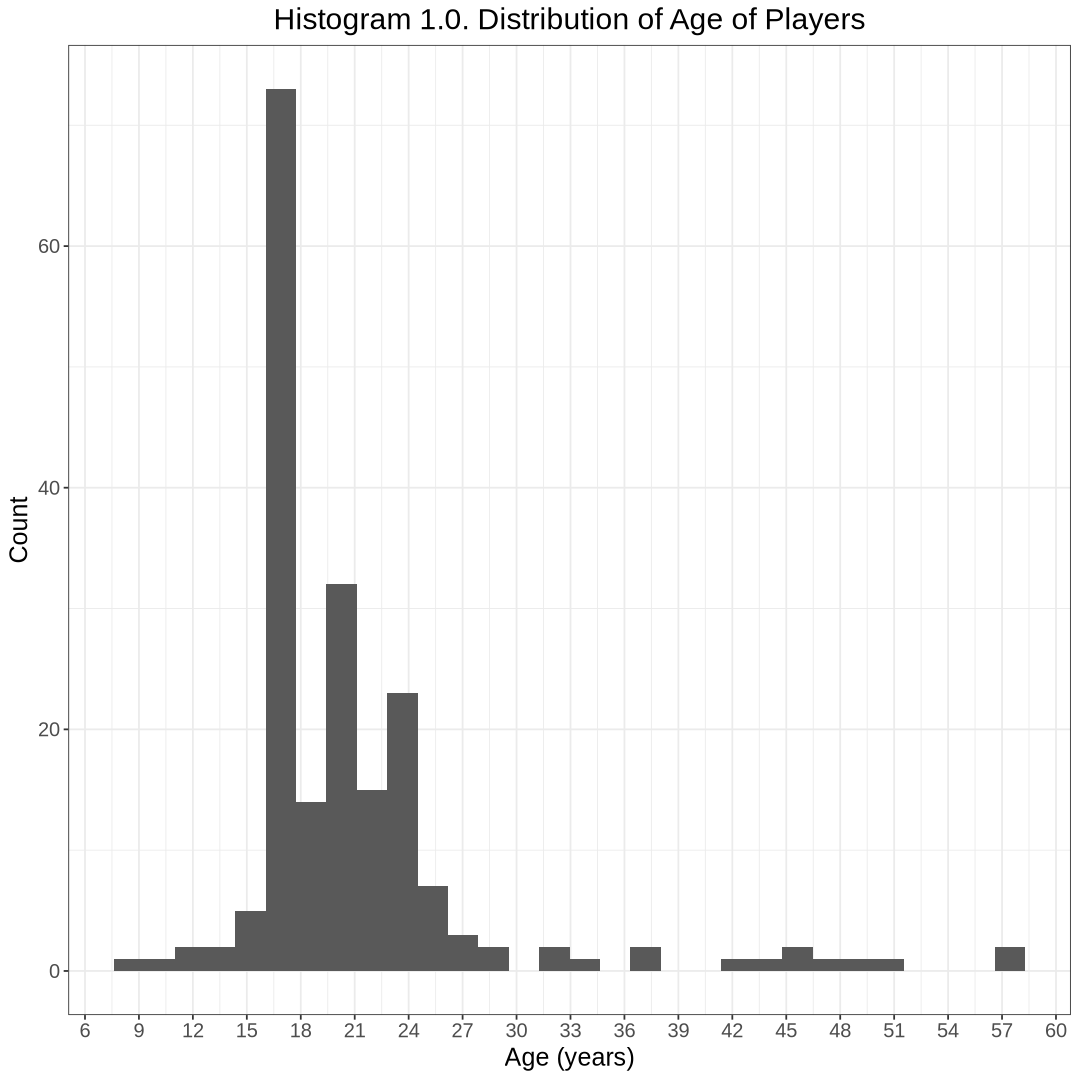

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


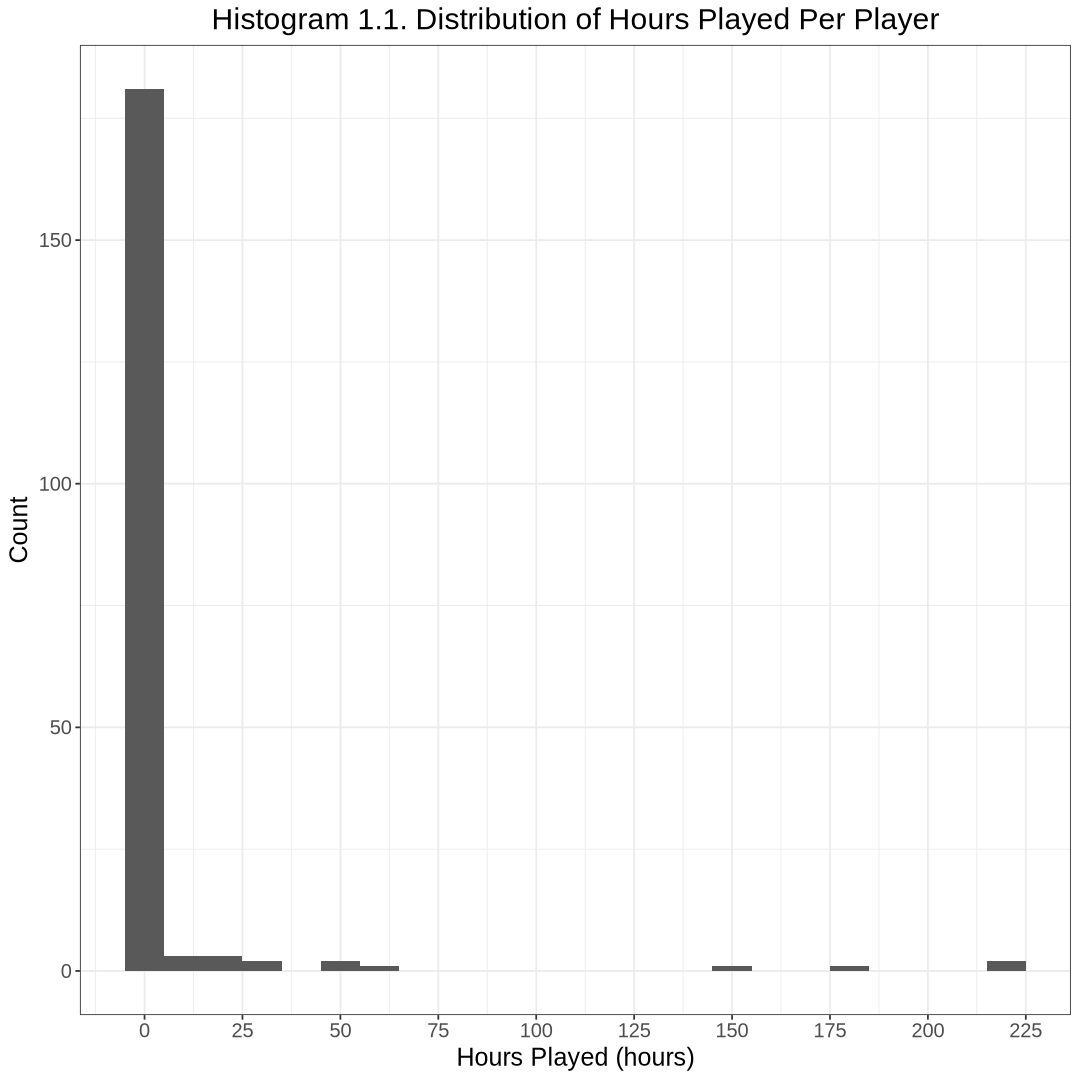

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


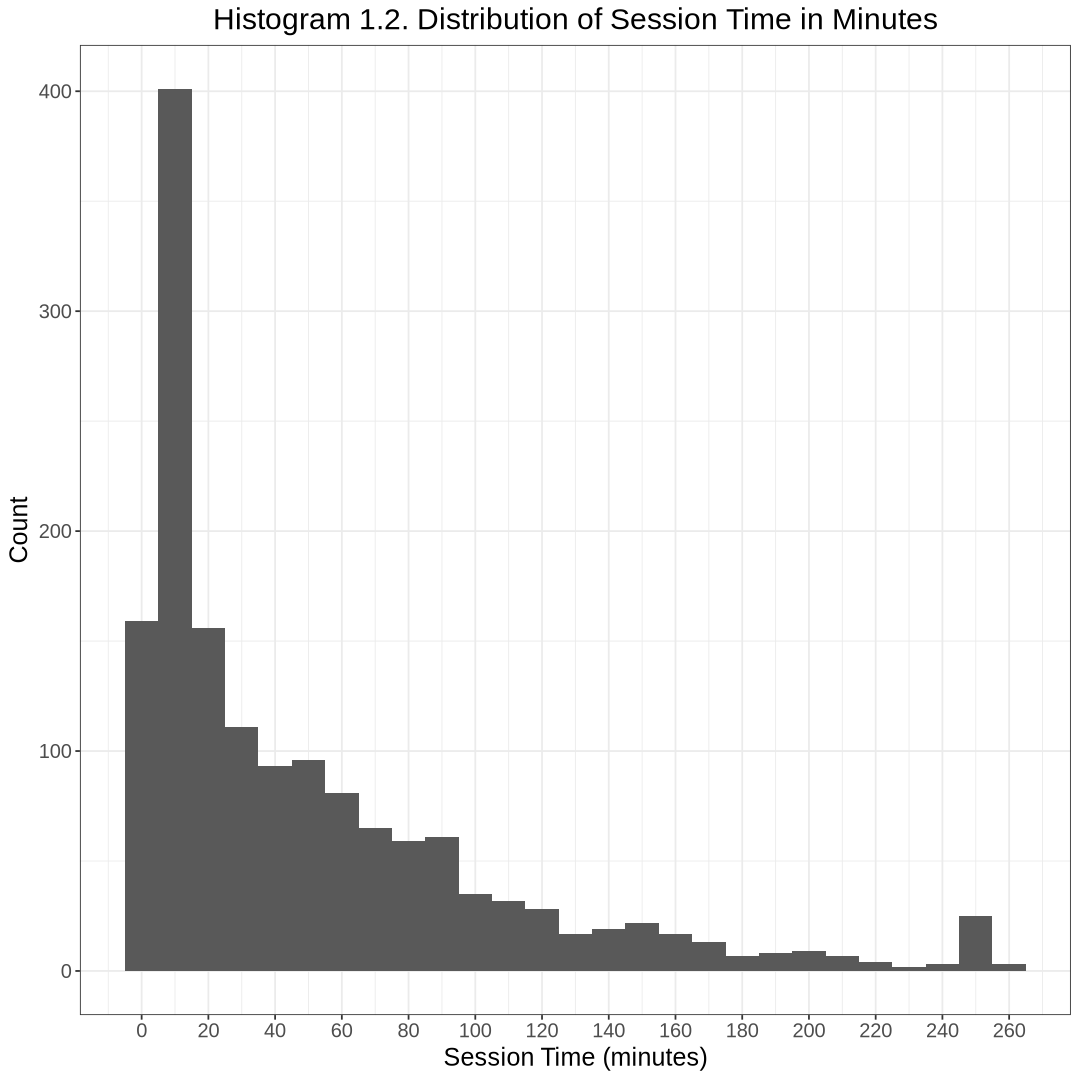

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


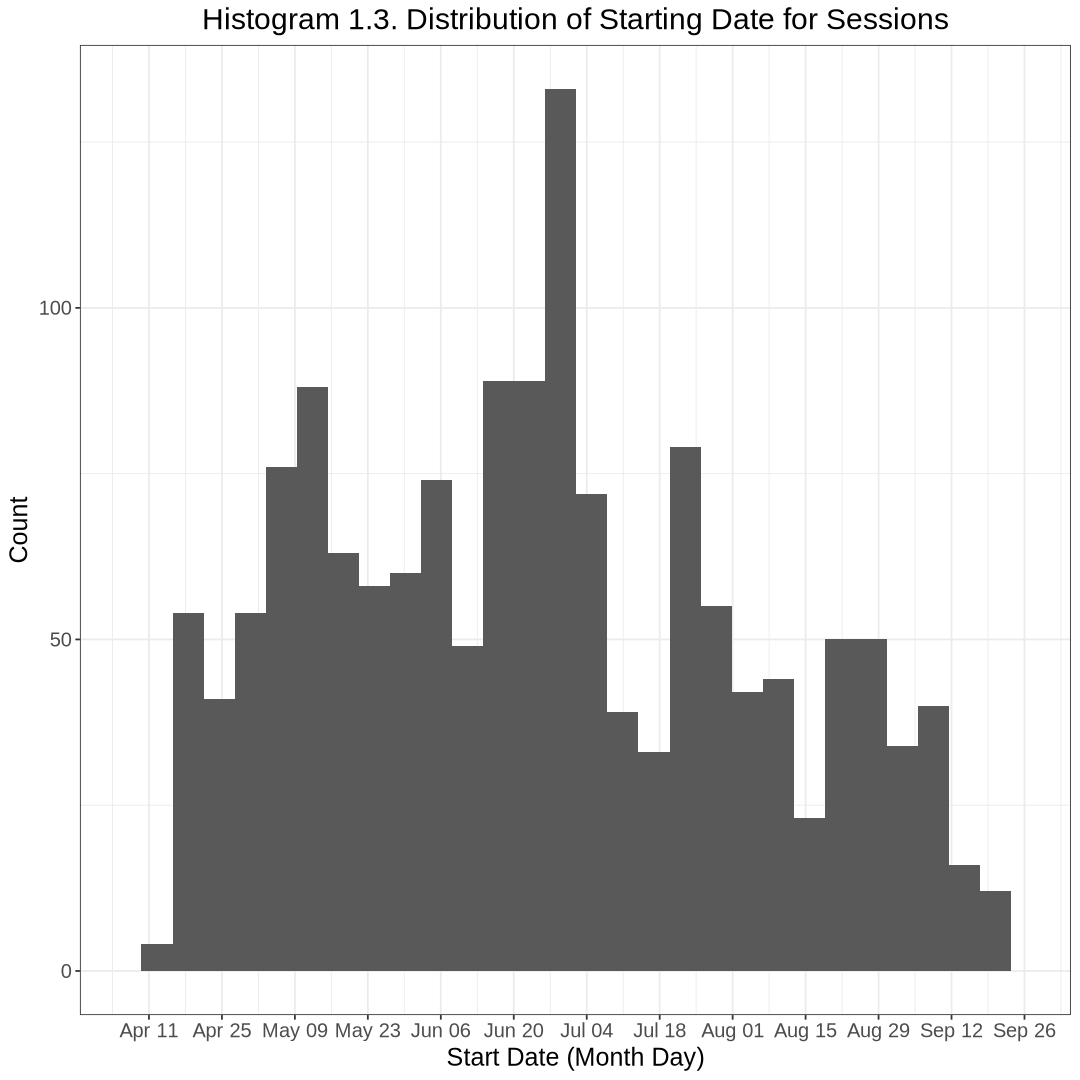

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


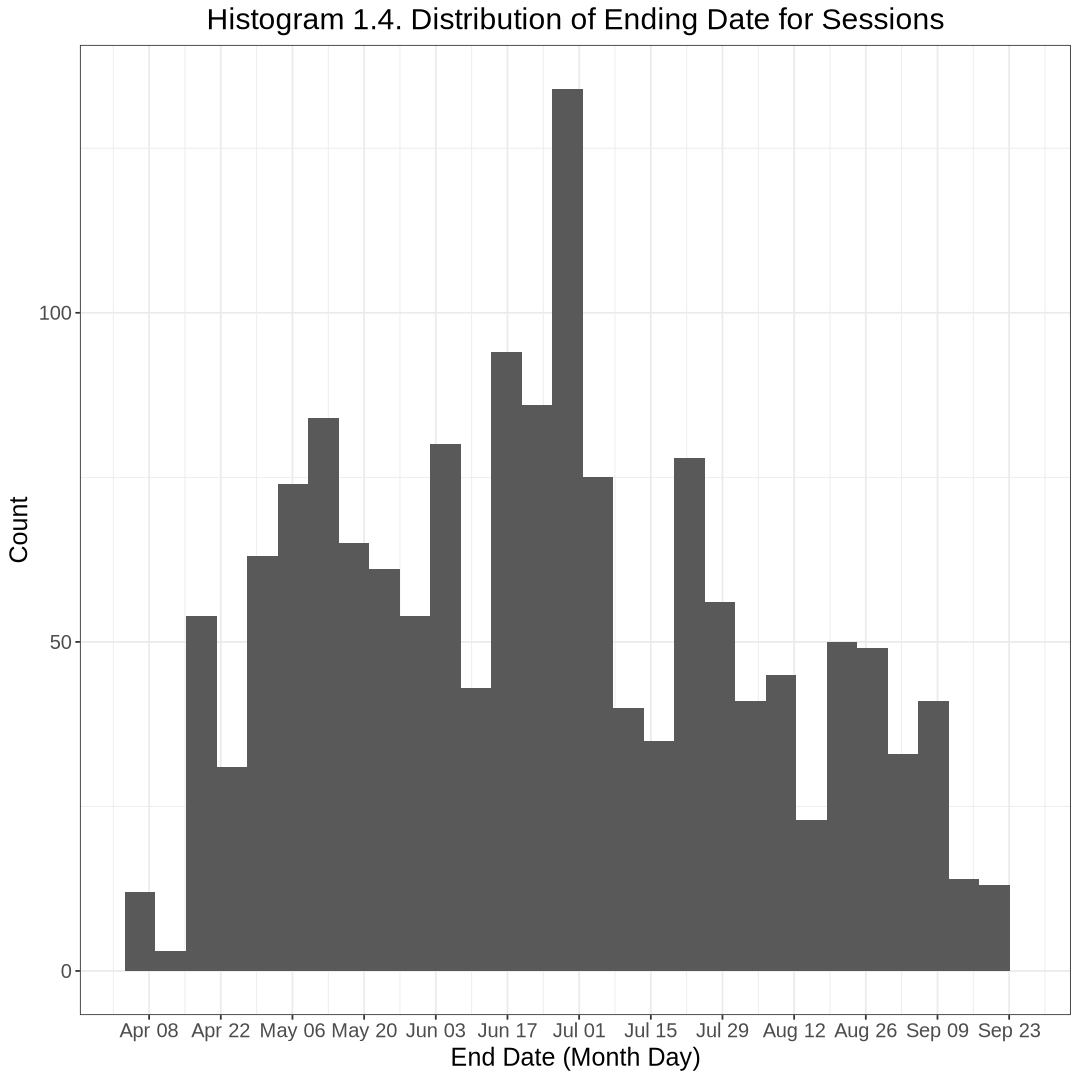

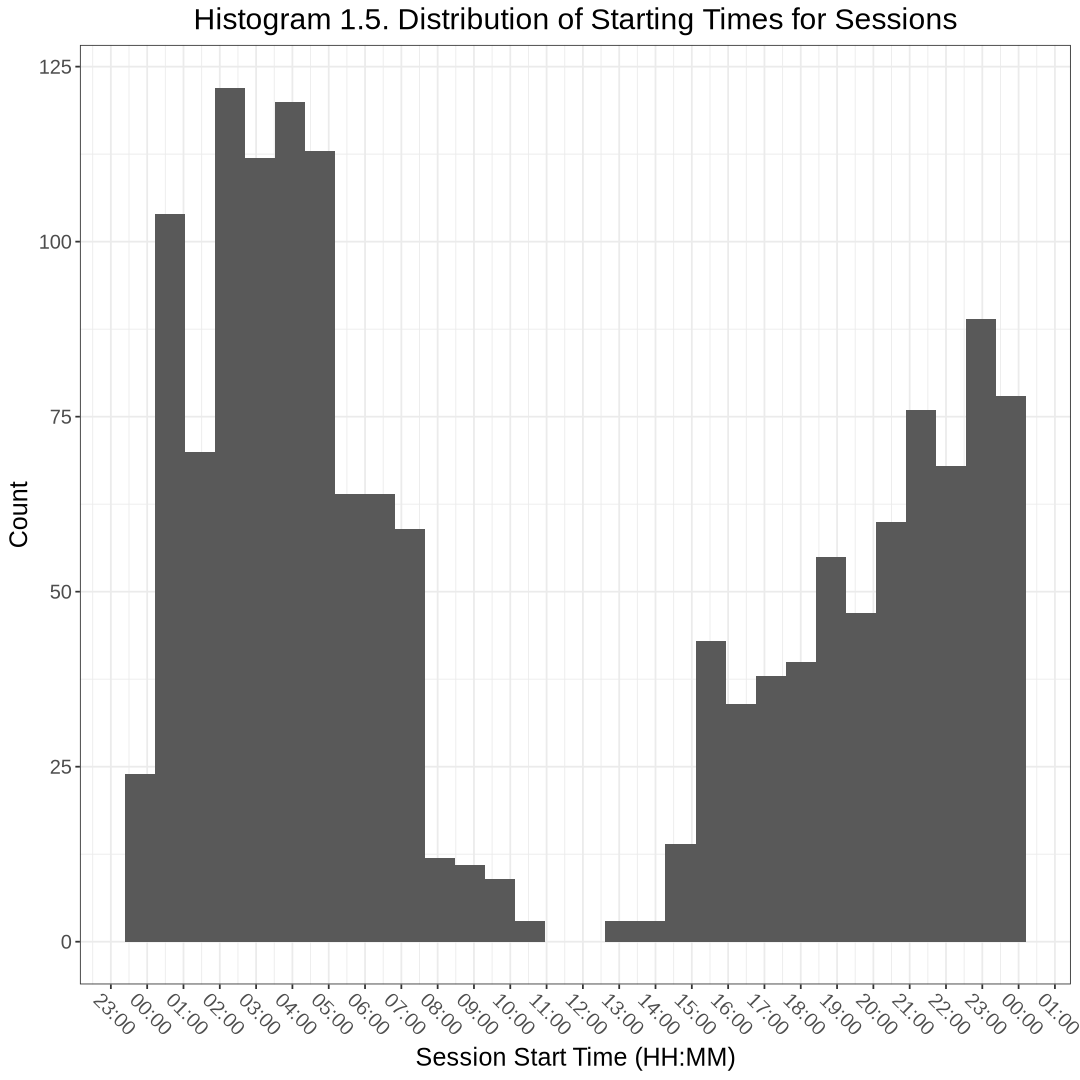

In [12]:
options(repr.plot.width = 9, repr.plot.height = 9)

age_plot <- players_data |> 
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(x = "Age (years)",
        y = "Count",
        title = "Histogram 1.0. Distribution of Age of Players") +
    scale_x_continuous(n.breaks = 20) +
    theme_bw() + 
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5))
    
played_hours_plot <- players_data |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Hours Played (hours)",
        y = "Count",
        title = "Histogram 1.1. Distribution of Hours Played Per Player") +
    scale_x_continuous(n.breaks = 10) +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5))
    
session_elapsed_plot <- sessions_players_elapsed |> 
 ggplot(aes(x =  session_time_elapsed)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Session Time (minutes)",
        y = "Count",
        title = "Histogram 1.2. Distribution of Session Time in Minutes") +
    scale_x_continuous(n.breaks = 20) +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5))

start_date <- min(sessions_players_elapsed$start_time)
end_date <- max(sessions_players_elapsed$start_time)
session_time_plot <- sessions_players_elapsed |> 
    ggplot(aes(x = start_time)) +
    geom_histogram() +
    labs(x = "Start Date (Month Day)",
        y = "Count",
        title = "Histogram 1.3. Distribution of Starting Date for Sessions") +
    scale_x_datetime(date_labels = "%b %d",
                    date_breaks = "14 days",
                    limits =  as.POSIXct(c(start_date, end_date))) +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5))

start_date1 <- min(sessions_players_elapsed$end_time)
session_time_plot1 <- sessions_players_elapsed |> 
    ggplot(aes(x = end_time)) +
    geom_histogram() +
    labs(x = "End Date (Month Day)",
        y = "Count",
        title = "Histogram 1.4. Distribution of Ending Date for Sessions") +
    scale_x_datetime(date_labels = "%b %d",
                    date_breaks = "14 days",
                    limits =  as.POSIXct(c(start_date1, end_date))) +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5))

# Isolate the times when playing starts and ignore dates
starting_times <- sessions_players_elapsed |>
    mutate(start_times = as.POSIXct(format(start_time, "%H:%M"),
      format = "%H:%M", tz = "UTC"))

session_time_plot2 <- starting_times |> 
    ggplot(aes(x = start_times)) +
    geom_histogram() +
    labs(x = "Session Start Time (HH:MM)",
        y = "Count",
        title = "Histogram 1.5. Distribution of Starting Times for Sessions") +
    scale_x_datetime(date_labels = "%H:%M",
                    date_breaks = "1 hour") +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1))



ggsave("age_plot.png", plot = age_plot, width = 9, height = 9, dpi = 300)
ggsave("played_hours_plot.png", plot = played_hours_plot, width = 9, height = 9, dpi = 300)
ggsave("session_elapsed_plot.png", plot = session_elapsed_plot, width = 9, height = 9, dpi = 300)
ggsave("session_time_plot.png", plot = session_time_plot, width = 9, height = 9, dpi = 300)
ggsave("session_time_plot1.png", plot = session_time_plot1, width = 9, height = 9, dpi = 300)
ggsave("session_time_plot2.png", plot = session_time_plot2, width = 9, height = 9, dpi = 300)

age_plot
played_hours_plot
session_elapsed_plot
session_time_plot
session_time_plot1
session_time_plot2
# bind_cols(sessions_data$start_time, starting_times$start_times)
